In [1]:
import pandas as pd
import Quandl
import pandas_datareader.data as web
%matplotlib inline

In [2]:
start = pd.Timestamp("1996-10-08")
end = pd.Timestamp("2015-12-30")
year = pd.Timedelta('365 days')
online = False

In [3]:
if online:
    merv = web.DataReader("^MERV", 'yahoo', start, end)
    usdars = Quandl.get("CURRFX/USDARS")
    merv.to_csv('merv_ars.csv')
    usdars.to_csv('usdars.csv')
else:
    merv = pd.read_csv('merv_ars.csv', index_col='Date', parse_dates=True)
    usdars = pd.read_csv('usdars.csv', index_col='Date', parse_dates=True)

In [4]:
df = pd.DataFrame()
df['merv_ars'] = merv[u'Adj Close']
df['usdars'] = usdars.Rate
df['merv_usd'] = df.merv_ars / df.usdars

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C456CF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C764748>], dtype=object)

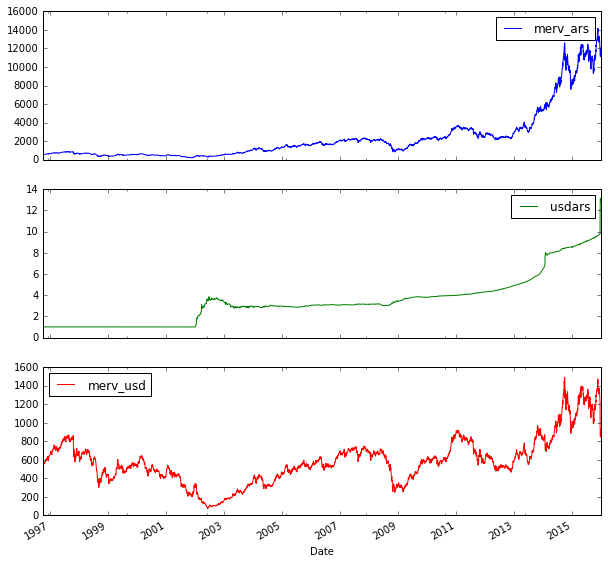

In [5]:
df.plot(subplots=True, figsize=(10, 10), sharex=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CFBA470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D48D358>], dtype=object)

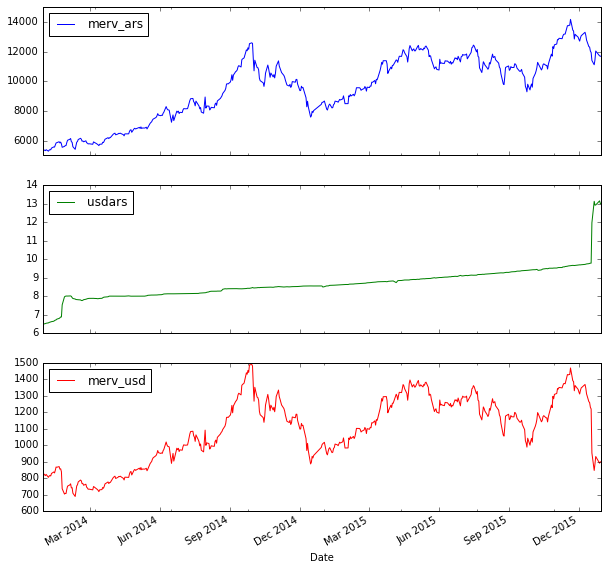

In [6]:
# Los últimos 2 años
df.loc[(end - 2*year):].plot(subplots=True, figsize=(10, 10), sharex=True)